In [32]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st


**Pair Programming Estadística III**

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.
Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.
Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [51]:
tik_tok2 = pd.read_csv("TikTok_songs_2022.csv")
tik_tok2.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


Objetivos
Los objetivos de hoy son:

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

- Tabla de contingencia.

In [42]:
# definimos la función
def popularidad_artista(col):
    if col <= 40:
        return "BAJA"
    elif col >= 41 and col <= 75:
        return "MEDIA"
    else:
        return "ALTA"


# aplicamos la función a nuestra columna
tik_tok2["artist_pop_cat"] = tik_tok2["artist_pop"].apply(popularidad_artista)

In [43]:
tik_tok2.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,artist_pop_cat
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933,ALTA
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303,ALTA
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026,MEDIA
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805,ALTA
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822,ALTA


In [45]:
tiktok2_conting = pd.crosstab(tik_tok2['artist_name'], 
                            tik_tok2['artist_pop_cat']) 
tiktok2_conting.head()

artist_pop_cat,ALTA,BAJA,MEDIA
artist_name,,,
24kGoldn,0,0,1
Alex Alexander,0,0,4
Alex D'Rosso,0,0,3
Alfons,0,0,1
Amaarae,0,0,1


- Coeficiente de correlación de las variables numéricas del dataset.

In [46]:
# calculamos la matriz de correlación de todas las variables numéricas de nuestro df
tiktok2_correl = tiktok2_conting.corr()
tiktok2_correl

artist_pop_cat,ALTA,BAJA,MEDIA
artist_pop_cat,,,
ALTA,1.000000,-0.190965,-0.386876
BAJA,-0.190965,1.000000,-0.325179
MEDIA,-0.386876,-0.325179,1.000000


<AxesSubplot:xlabel='artist_pop_cat', ylabel='artist_pop_cat'>

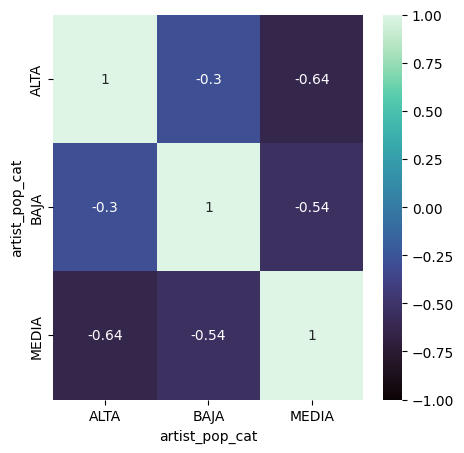

In [47]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (5,5))

# creamos la gráfica
sns.heatmap(tiktok2_correl.corr(), # lo que queremos visualizar
            cmap = "mako", # color del gráfico
            annot = True, # para que nos aparezcan los valores de la correlacion
            vmin = -1, # establecemos el valor mínimo de la escala de color
            vmax = 1) # establecemos el valor máximo de la escala de color

- Sesgos de alguna de las variables numéricas del dataset.

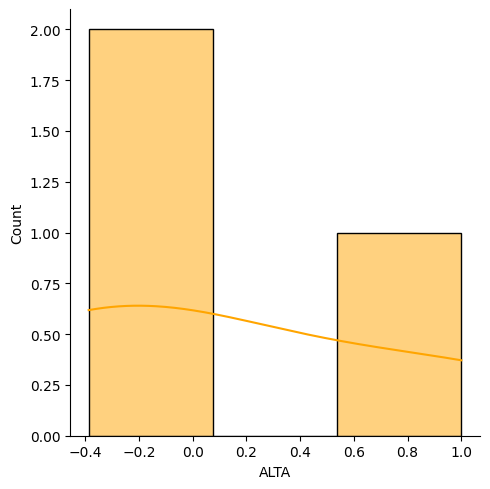

In [56]:
sns.displot(tiktok2_correl["ALTA"], # sobre que columna queremos hacer la gráfica
            color = "ORANGE", # que color le queremos poner a la gráfica
            kde = True);# para que nos visualice la línea de tendencia

In [57]:
# aplicamos el método skew para saber si esta o no sesgada nuestra variable
skewness = skew(tiktok2_correl['ALTA'])
print(f"El valor del sesgo para la variable alta es: {skewness}")

El valor del sesgo para la variable alta es: 0.6532975797451722



- Intervalo de confianza de algunas de las variables numéricas del dataset.

In [53]:
# Queremos realizar el calculo de confianza para la popularidad alta.
confianza = tik_tok2['artist_pop']

# Utilizamos Scipy para calcular el intervalo de confianza del 95% de la media de los datos.
# Dicho intervalo nos indica donde está la media de los valores de popularidad de los artistas con un 95 de probabilidad.
print(st.t.interval(alpha=0.95, df=len(confianza)-1, loc=np.mean(confianza), scale=st.sem(confianza)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(confianza))

(61.98303018069962, 66.38959339344487)
64.18631178707224


/var/folders/qq/jtqr5_ts3_5frnqgj2ky0sjr0000gn/T/ipykernel_61184/224468005.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(confianza)-1, loc=np.mean(confianza), scale=st.sem(confianza)))


2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

In [ ]:
# A través de una función cambiamos los datos de cuantitativos (numéricos) a cualitativos (texto) para que sean más visuales y fáciles de 
# interpretar.

# Agrupamos las puntuaciones de la popularidad de los artistas en tres rangos (ALTA, MEDIA Y BAJA) de manera que simplificamos los datos.

# Cruzamos esta nueva forma de ver las puntuaciones con los nombres de los artistas y esto nos genera una nueva tabla. Esta tabla nos muestra el número de canciones
# en cada valoracion que los artistas tienen (ejemplo: Alex D'Rosso tiene 3 canciones de popularidad MEDIA).

# Estudiando la correlación de las puntuaciones observamos que no existe entre estas, lo cual es lógico ya que cada puntuación es subjetiva e independiente 
# para cada canción.

# La campana es casi inexistente por que el número de artistas analizados es muy alto y las puntuaciones de estos son pocas por cada uno. Hay artistas que tienen un 
# tema, otros dos, pero no hay un cúmulo de datos que pueda generar la curva de la campana de manera pronunciada.

# El intervalo de confianza nos indica que, con los datos que tenemos, hay un 95% de posibilidades de que la próxima valoración de popularidad que entre en la tabla
# estará entre 61.98 y 66.38 sobre 100.

